In [1]:
import json
import cv2
import matplotlib.pyplot as plt
from os import path
import os
import numpy as np

In [2]:
path_type = 'val'

In [3]:
with open('data2/{}/via_region_data.json'.format(path_type)) as f:
  data = json.load(f)

# Output: {'name': 'Bob', 'languages': ['English', 'Fench']}
files = []
regions_arr = []
for key, value in data.items():
    files.append(value['filename'])
    regions_arr.append(value['regions'])


In [4]:
def read_image(filepath):
    img = cv2.imread(filepath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [5]:
def draw_mask(mask, region_points):
    cv2.fillPoly(mask, [(1,1),(1,2), (2,1), (2,2)], 255)

In [6]:
def store_images(base_path, img, mask, index):
    X_path = os.path.join(base_path, 'X')
    Y_path = os.path.join(base_path, 'Y')
    os.makedirs(X_path, exist_ok=True)
    os.makedirs(Y_path, exist_ok=True)
    cv2.imwrite(os.path.join(X_path, '{}.png'.format(index)), img)
    cv2.imwrite(os.path.join(Y_path, '{}.png'.format(index)), mask)    
    

In [7]:
for index, file in enumerate(files):
    regions = regions_arr[index]
    filepath = path.join('./data2/{}/'.format(path_type), file)
    img = read_image(filepath)
    if (img.shape[0]!= 1410):
        continue
    print(img.shape)
    empty_img = np.zeros((img.shape[0],img.shape[1],1), dtype=np.uint8)  
    for region_key, region in regions.items():
        X = region['shape_attributes']['all_points_x']
        Y = region['shape_attributes']['all_points_y']
        points = list(zip(X, Y))
        points = np.array([points], dtype=np.int32)
        cv2.fillConvexPoly(empty_img, points, 1)
    store_images('./data3/{}/'.format(path_type), img, empty_img, index)
    
    

(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)
(1410, 1000, 3)


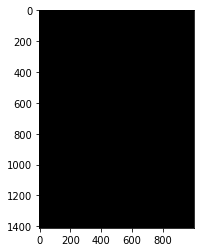

In [8]:
plt.imshow(empty_img, cmap='gray')

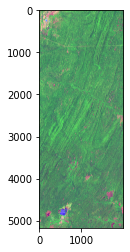

In [9]:
plt.imshow(img)